<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

«Хоть потоп» — страховая компания.

**Цель** — компании «Хоть потоп» нужно нужно защитить данные клиентов.

**Задача исследования** — разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию клиентов компании. Подбирать наилучшую модель не требуется.

**Исследование пройдёт в пять этапов:**
 1. Загрузка и подготовка данных;
 2. Умножение матриц;
 3. Алгоритм преобразования;
 4. Проверка алгоритма;
 5. Общий вывод.

## Загрузка и подготовка данных

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
 
# сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
 
# сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

Данные для исследования получаем из файла `insurance`:

In [3]:
# чтение файлов с данными и сохранение в df
try:
    df = pd.read_csv('datasets/insurance.csv')
except:
    df = pd.read_csv('/datasets/insurance.csv')

In [4]:
# получение первых пяти строк таблиц
display(df.head())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


**Описание данных**

*Признаки:*
*	`Пол`;
*	`Возраст`;
*	`Зарплата` — зарплата застрахованного;
*	`Члены семьи` — количество членов застрахованного;


*Целевой признак:*
*	`Страховые выплаты` — количество страховых выплат клиенту за последние 5 лет.

**Обработка пропусков**

In [5]:
# подсчёт доли пропусков 
display(df.isna().mean())

Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

В данных не содержится пропусков

**Приведение данных к корректному типу**

In [6]:
# получение информации о типах данных
display(df.dtypes)

Пол                    int64
Возраст              float64
Зарплата             float64
Члены семьи            int64
Страховые выплаты      int64
dtype: object

Приведем данные к корректному типу, а также чтобы сэкономить память и процессорное время при обработке данных изменим тип данных на более оптимальный:

In [7]:
# изменение типа данных на float32
df['Пол'] = pd.to_numeric(df['Пол'], downcast='integer')
df['Возраст'] = pd.to_numeric(df['Возраст'], downcast='integer')
df['Зарплата'] = df['Зарплата'].astype('int')
df['Члены семьи'] = pd.to_numeric(df['Члены семьи'], downcast='integer')
df['Страховые выплаты'] = pd.to_numeric(df['Страховые выплаты'], downcast='integer')

In [8]:
# получение информации о типах данных
display(df.dtypes)

Пол                   int8
Возраст               int8
Зарплата             int32
Члены семьи           int8
Страховые выплаты     int8
dtype: object

**Поиск и обработка дубликатов**

In [9]:
# подсчет явных дубликатов
print("Явных дубликатов в df:", df.duplicated().sum())

Явных дубликатов в df: 153


В колонках содержатся дубликаты, однако для данных признаков считаем это допустимым.

**Поиск аномалий в данных**

In [10]:
# числовое описание данных
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.359400,1.194200,0.148000
std,0.500049,8.440807,9900.082063,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


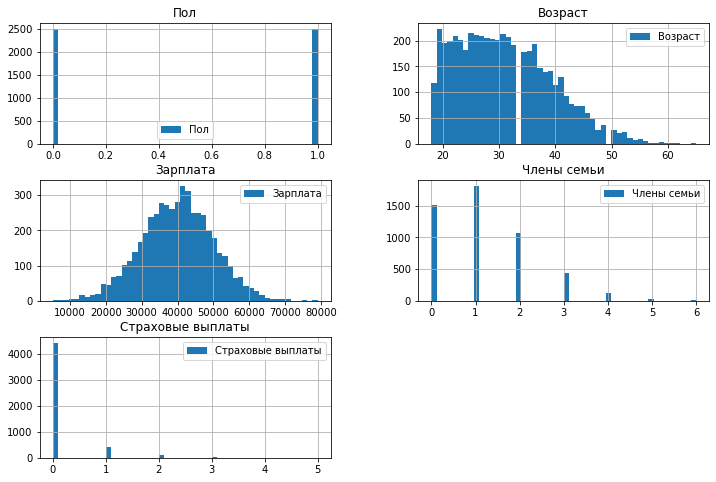

In [11]:
# распределение
df.hist(bins=50, figsize=(12,8), legend=True);

Явных аномалий в данных не обнаружено.

### Выводы

💡 В исходном файле содержатся данные о клиентах страховой компании «Хоть потоп». 

В ходе первичного анализа данных было выявлено:     

* В данных не обнаружено пропусков;    

* В колонках содержатся дубликаты, однако для данных признаков это допустимо;     

* Данные были приведены к соответствующим типам;    

* Аномалии не выявлены.

## Умножение матриц

Гипотеза: качество линейной регрессии **не изменится** , если признаки умножают на обратимую матрицу.

**Обоснование:**

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Обоснование строится на следующих свойствах:

* Умножение матрицы на единичную матрицу — исходная матрица: $AE = EA = A$
* Произведение единичных матриц — единичная матрица: $E E = E$
* Умножение матрицы на обратную матрицу даёт единичную матрицу: $A A^{-1} = A^{-1}A = E$
* $(𝐴𝐵)^𝑇 = 𝐵^𝑇𝐴^𝑇$
* $(𝐴𝐵)^{-1} = 𝐵^{-1} 𝐴^{-1}$


Следовательно:

1) Выразим предсказания через формулу обучения:   

$$
a = X_*w = X_* (X^T X)^{-1} X^T y
$$

2) Докажем что  умножение признаков на обратимую матрицу $P$ дает равенство формул:    

$$
a_* = (X_*P)w = (X_*P) ((XP)^T XP)^{-1} (XP)^T y = (X_*P) (P^T X^T X P)^{-1} (XP)^T y = X_*P P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y = X_* (X^T X)^{-1} X^T y
$$

💡 В итоге преобразований мы получили одинаковые формулы, следовательно умножение признаков на обратимую матрицу не должно изменить качество линейной регрессии.

## Алгоритм преобразования

**Алгоритм:**

В целях защиты данных клиентов страховой компании будем умножать матрицу признаков на случайную обратимую матрицу, для этого для случайно сгенерированной матрицы будем проводить проверку на обратимость, далее преобразовывать признаки и оценивать качество регрессии.

**Обоснование:**    

Как было доказано выше, согласно нашей формуле обучения, при умножении признаков на обратимую матрицу будут получаться обратные матрицы, произведение которых с исходной матрицей будет давать единичные матрицы. Таким образом это не изменит качество линейной регрессии. 

## Проверка алгоритма

Сначала проверим, что качество и параметры линейной регрессии из sklearn не отличается от формульного вычисления:

In [12]:
# переменные для признаков и целевых признаков:
features = df.drop('Страховые выплаты',axis=1)
target = df['Страховые выплаты']

In [13]:
# Формульный расчет
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
y = target
w = (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)
print("Формульный расчет:")
print(w[1:])
print(w[0])

# Расчет через sklearn
model = LinearRegression()
model.fit(features, target)
print()
print("Расчет через sklearn:")
print(model.coef_)
print(model.intercept_)

Формульный расчет:
[ 7.92580563e-03  3.57083050e-02 -1.70081903e-07 -1.35676627e-02]
-0.9382354469755971

Расчет через sklearn:
[ 7.92580563e-03  3.57083050e-02 -1.70081903e-07 -1.35676627e-02]
-0.9382354469759032


💡 Параметры регрессии идентичны.

In [24]:
X = features
X_T = features.T

display(X_T)
display(X)

0      1      2      3      4      5      6      7      8     \
Пол              1      0      0      0      1      1      1      1      1   
Возраст         41     46     29     21     28     43     39     25     36   
Зарплата     49600  38000  21000  41700  26100  41000  39700  38600  49700   
Члены семьи      1      1      0      2      0      2      2      4      1   

              9      10     11     12     13     14     15     16     17    \
Пол              1      1      1      0      0      0      1      1      1   
Возраст         32     25     38     23     21     40     34     26     41   
Зарплата     51700  36600  29300  39500  55000  43700  23300  48900  33200   
Члены семьи      1      1      0      3      0      1      0      2      2   

              18     19     20     21     22     23     24     25     26    \
Пол              1      1      1      1      0      0      0      1      1   
Возраст         42     27     38     36     41     33     21     47     25   
Зарплата     49700  36900  43500  36100  26600  48700  40400  38400  34600   
Члены семьи      0      0      1      1      0      2      3      3      1   

              27     28     29     30     31     32     33     34     35    \
Пол              1      1      0      0      1      1      0      0      1   
Возраст         30     19     21     25     40     30     31     19     27   
Зарплата     34800  36800  42200  46300  30300  51000  28100  64800  30400   
Члены семьи      1      0      2      0      0      2      0      2      0   

              36     37     38     39     40     41     42     43     44    \
Пол              1      0      1      1      1      1      1      0      0   
Возраст         22     27     31     33     42     39     42     20     30   
Зарплата     45300  38300  49500  19400  40200  31700  69200  33100  31600   
Члены семьи      2      0      1      1      0      1      0      1      2   

              45     46     47     48     49     50     51     52     53    \
Пол              0      0      0      1      0      1      0      1      1   
Возраст         24     26     42     25     28     28     30     29     34   
Зарплата     30400  34500  38700  33100  36600  39600  38600  42400  34600   
Члены семьи      1      1      1      1      1      0      2      0      0   

              54     55     56     57     58     59     60     61     62    \
Пол              1      0      0      0      1      1      0      0      1   
Возраст         42     46     19     31     20     30     28     38     23   
Зарплата     28100  34900  30500  48900  24200  49900  14300  47000  44800   
Члены семьи      2      1      0      0      3      1      1      1      1   

              63     64     65     66     67     68     69     70     71    \
Пол              0      0      1      1      1      1      1      1      0   
Возраст         32     27     18     43     37     20     39     42     40   
Зарплата     43800  42700  35400  57200  29600  37400  48100  33700  61800   
Члены семьи      1      3      2      4      2      2      1      1      1   

              72     73     74     75     76     77     78     79     80    \
Пол              0      1      1      0      0      1      0      1      1   
Возраст         40     32     24     48     37     40     43     29     41   
Зарплата     39400  15600  47000  49500  52600  37600  34900  52500  32700   
Члены семьи      1      2      3      0      0      2      0      3      0   

              81     82     83     84     85     86     87     88     89    \
Пол              1      0      1      0      0      0      0      1      0   
Возраст         29     31     37     26     25     45     28     24     44   
Зарплата     51600  37400  60900  41800  47400  26500  45900  33100  45300   
Члены семьи      1      2      2      1      2      2      0      1      0   

              90     91     92     93     94     95     96     97     98    \
Пол              1      1 

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0
5,1,43,41000,2
6,1,39,39700,2
7,1,25,38600,4
8,1,36,49700,1
9,1,32,51700,1


In [23]:
X_T_X = X_T @ X
display(X_T_X)

,Пол,Возраст,Зарплата,Члены семьи
Пол,2495,77271,99960297,2955
Возраст,77271,5146544,1874672442,184511
Зарплата,99960297,1874672442,-251754421,236704195
Члены семьи,2955,184511,236704195,13085


In [21]:
X_T_X_inv = np.linalg.inv(X_T_X)
display(X_T_X_inv)

array([[ 4.53497346e-04, -2.93627725e-06,  5.92829795e-09,
        -1.68250837e-04],
       [-2.93627725e-06,  3.47456365e-07, -1.50603472e-10,
        -1.51198690e-06],
       [ 5.92829795e-09, -1.50603472e-10, -1.17687671e-13,
         2.91379765e-09],
       [-1.68250837e-04, -1.51198690e-06,  2.91379765e-09,
         8.30302875e-05]])

In [25]:
display(X_T_X_inv @ X_T)

0             1             2             3             4     \
0  4.589027e-04 -7.804427e-05  3.934222e-05 -1.509535e-04  5.260102e-04   
1  2.327515e-06  8.748074e-06  6.913562e-06 -2.007555e-06  2.861750e-06   
2 -3.169955e-09 -8.486094e-09 -6.838942e-09 -2.242654e-09 -1.360247e-09   
3 -2.687649e-06  1.242032e-04  1.734213e-05  2.558142e-04 -1.345364e-04   

           5             6             7             8             9     \
0  2.337960e-04  2.378343e-04 -6.408063e-05  4.741769e-04  4.977786e-04   
1  2.805630e-06  1.611589e-06 -6.111110e-06  5.751725e-07 -1.115860e-06   
2  4.547494e-10  1.210157e-09  9.275658e-09 -2.428707e-09 -2.061668e-09   
3  5.226000e-05  5.452002e-05  2.385432e-04  5.163665e-06  1.703921e-05   

           10            11            12            13            14    \
0  4.288153e-04  5.156179e-04 -3.381191e-04  2.643946e-04 -2.663531e-05   
1 -1.273942e-06  5.854383e-06 -2.493301e-06 -9.866073e-07  5.804896e-06   
2  7.696400e-10 -3.242883e-09  6.288501e-10 -9.635495e-09 -8.253292e-09   
3 -1.637523e-05 -1.403321e-04  3.294102e-04  1.285071e-04  1.498838e-04   

           15            16            17            18            19    \
0  4.917933e-04  3.305462e-04  1.934278e-04  6.248101e-04  5.929721e-04   
1  5.368178e-06 -4.290895e-06  3.285425e-06  4.171898e-06  8.877765e-07   
2 -1.934343e-09  2.085276e-09  1.673920e-09 -6.246125e-09 -2.480671e-09   
3 -1.517669e-04  1.009828e-04  3.255636e-05 -8.693854e-05 -1.015553e-04   

           20            21            22            23            24    \
0  4.315489e-04  3.935521e-04  3.730536e-05 -1.446907e-04 -3.269111e-04   
1  2.203827e-06  2.623380e-06  1.023966e-05  1.107697e-06 -3.323757e-06   
2 -2.000250e-09 -8.281543e-10 -9.305234e-09 -4.873709e-09  8.241381e-10   
3 -1.592585e-05 -3.446398e-05  1.551555e-05  2.580670e-04  3.350566e-04   

           25            26            27            28            29    \
0  3.838645e-05  4.169587e-04  4.034630e-04  6.158694e-04 -1.479893e-04   
1  3.075038e-06 -9.727351e-07  7.344260e-07 -1.876814e-06 -2.082857e-06   
2  3.072121e-09  1.005015e-09  2.284605e-10 -1.264074e-09 -2.301497e-09   
3  1.216665e-04 -2.220282e-05 -2.918000e-05 -8.975083e-05  2.572711e-04   

           30            31            32            33            34    \
0  2.010733e-04  5.156737e-04  3.312506e-04  7.556058e-05 -8.137234e-06   
1  1.713468e-06  6.398692e-06 -3.217337e-06  6.539190e-06 -6.181408e-06   
2 -9.214026e-09 -3.661777e-09  1.235718e-09 -7.975731e-09 -4.660032e-09   
3  9.710916e-05 -1.404422e-04  1.010538e-04  3.500612e-05  3.261469e-04   

           35            36            37            38            39    \
0  5.544381e-04  3.209495e-04  1.477743e-04  4.876727e-04  3.033583e-04   
1  1.866699e-06 -5.138548e-06  3.613209e-06 -1.131989e-06  4.096089e-06   
2 -1.715701e-09  3.111365e-09 -8.573732e-09 -1.652152e-09  1.589040e-09   
3 -1.204950e-04  9.654106e-05  7.077480e-05  1.214084e-05 -7.858844e-05   

           40            41            42            43            44    \
0  5.684913e-04  3.586587e-04  7.404119e-04 -3.074972e-05 -2.372558e-04   
1  5.602631e-06  4.328404e-06  1.235130e-06  4.521655e-07  2.640647e-06   
2 -5.128092e-09 -7.621390e-10 -8.541035e-09 -3.993734e-09 -2.409439e-09   
3 -1.146196e-04 -5.182065e-05 -3.011949e-05  1.492373e-04  2.127770e-04   

           45            46            47            48            49    \
0 -5.850123e-05 -4.006777e-05 -6.214935e-05  4.080662e-04 -3.349089e-05   
1  2.248620e-06  2.326059e-06  7.252826e-06 -7.468299e-07  2.704704e-06   
2 -4.278391e-09 -5.062117e-09 -7.966061e-09  1.181547e-09 -5.610468e-09   
3  1.353221e-04  1.442446e-04  1.322908e-04 -2.657352e-05  1.473396e-04   

           50            51            52            53            54    \
0  6.060422e-04 -1.957577e-04  6.197051e-04  5.587830e-04  1.602572e-04   
1  8.286035e-07  1.586423e-06  7.543701e-07  3.666359e-06  4.400959e-06   
2 -2.949031e-09 -3.233253e

Выполним преобразование данных согласно алгоритму:

In [14]:
inv_matrix = np.random.normal(size=(features.shape[1], features.shape[1]))
display("Случайная квадратная матрица:", inv_matrix)

display("Обратная ей матрица:", np.linalg.inv(inv_matrix)) # проверка на обратимость
features_new = features @ inv_matrix
display(features.head())
display(features_new.head())

'Случайная квадратная матрица:'

array([[ 0.03627378, -0.22106552,  0.59641925,  0.20219223],
       [-0.26918703,  2.85555495, -0.09535196,  2.91861961],
       [ 0.85360684, -0.99807346,  0.73023428, -2.81793296],
       [-1.00183522,  0.61811631, -0.40520835, -0.29616022]])

'Обратная ей матрица:'

array([[-0.86316007,  0.20882659,  0.24637939, -0.87560542],
       [-0.27062501,  0.42091603,  0.39415778,  0.21294325],
       [ 1.54893237,  0.15848625,  0.25136044,  0.22766835],
       [ 0.23577133, -0.04475522, -0.35470513, -0.28166197]])

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


,0,1,2,3
0,42326.897208,-49386.968785,36215.902237,-139649.905575
1,32423.675615,-37794.817815,27744.111371,-106947.492287
2,17917.937290,-20876.731555,15332.154745,-59091.952274
3,35587.748776,-41558.460372,30447.956810,-117447.105904
4,22271.637652,-25969.982819,19057.041361,-73466.126817


💡 Данные были успешно преобразованы благодаря умножению на случайную квадратную матрицу

Разделим данные на обучающую и тестовую выборки и проверим качество модели после проведенных преобразований:

In [15]:
# разделение данных на обучающую и тестовую выборки
features_train, features_test = train_test_split(features.copy(), train_size=0.75, test_size=0.25, random_state=12345)
target_train, target_test = train_test_split(target.copy(), train_size=0.75, test_size=0.25, random_state=12345)
features_train_new, features_test_new = train_test_split(features_new.copy(), train_size=0.75, test_size=0.25,
                                                         random_state=12345)

In [16]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
print("R2 для обычной матрицы признаков:", np.round(r2_score(target_test, predictions),2))

R2 для обычной матрицы признаков: 0.44


In [17]:
model = LinearRegression()
model.fit(features_train_new, target_train)
predictions = model.predict(features_test_new)
print("R2 для измененной матрицы признаков:", np.round(r2_score(target_test, predictions),2))

R2 для измененной матрицы признаков: 0.44


💡 Качество линейной регрессии из sklearn не отличается до и после преобразования.

## Общий вывод

В ходе работы было выполнено:

* Загружены, изучены и подготовлены данные;
* Математически проверена гипотеза о неизменности качества линейной регрессии в результате умножения признаков на обратимую матрицу;
* Предложен и обоснован алгоритм преобразования данных для шифрования персональной информации клиентов компании;
* В результате проверки алгоритма отличий в качестве линейной регрессии до и после преобразования не выявлено.

**Таким образом, был разработан метод преобразования данных, шифрующий персональную информацию клиентов компании «Хоть потоп», что поможет компании в защитите персональной информации.**